##                          HOUSE PRICE PREDICTION

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [41]:
df=pd.read_csv('housepricing.csv')

In [42]:
df.shape

(10000, 17)

In [43]:
df.head(10)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
5,39223,36,0,1,17,39489,8,6,2012,0,1,2009,4552,757,0,1,3926647.2
6,58682,10,1,1,99,6450,10,9,1995,1,1,5930,9453,848,0,5,5876376.5
7,86929,100,1,0,11,98155,3,4,2003,1,0,6326,4748,654,0,10,8696869.3
8,51522,3,0,0,61,9047,8,3,2012,1,1,632,5792,807,1,5,5154055.2
9,39686,42,0,0,15,71019,5,8,2021,1,1,5198,5342,591,1,3,3970892.1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [45]:
df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [46]:
df.isna().sum()/len(df)*100

squareMeters         0.0
numberOfRooms        0.0
hasYard              0.0
hasPool              0.0
floors               0.0
cityCode             0.0
cityPartRange        0.0
numPrevOwners        0.0
made                 0.0
isNewBuilt           0.0
hasStormProtector    0.0
basement             0.0
attic                0.0
garage               0.0
hasStorageRoom       0.0
hasGuestRoom         0.0
price                0.0
dtype: float64

In [47]:
df.nunique()

squareMeters          9483
numberOfRooms          100
hasYard                  2
hasPool                  2
floors                 100
cityCode              9509
cityPartRange           10
numPrevOwners           10
made                    32
isNewBuilt               2
hasStormProtector        2
basement              6352
attic                 6267
garage                 901
hasStorageRoom           2
hasGuestRoom            11
price                10000
dtype: int64

In [48]:
df['numberOfRooms'].unique()

array([  3,  39,  58,  47,  19,  36,  10, 100,  42,  21,  74,  31,  44,
        60,  88,  37,  43,  64,  12,  51,  56,  46,  72,   7,  98,  40,
        78,  89,  29,  87,   8,  27,  59,  38,  49,  66,  22,  97,  25,
        52,  11,   6,  82,  17,  57,   9,  15,  48,   5,  28,  20,  67,
        99,  73,  50,  69,   4,  75,  61,  55,  92,  23,  93,  71,  35,
        94,  24,  81,  91,  77,  68,  70,  54,  45,  63,  84,  34,  76,
        96,   1,  90,  95,  18,   2,  53,  41,  26,  16,  13,  65,  83,
        62,  79,  30,  85,  80,  33,  14,  32,  86], dtype=int64)

In [49]:
df['made'].unique()

array([2005, 2015, 2021, 2012, 1990, 1995, 2003, 1993, 2011, 2008, 2004,
       2018, 2009, 2013, 2016, 2017, 2000, 2019, 2020, 1994, 2014, 1998,
       2001, 1996, 1991, 1992, 1999, 1997, 2010, 2007, 2006, 2002],
      dtype=int64)

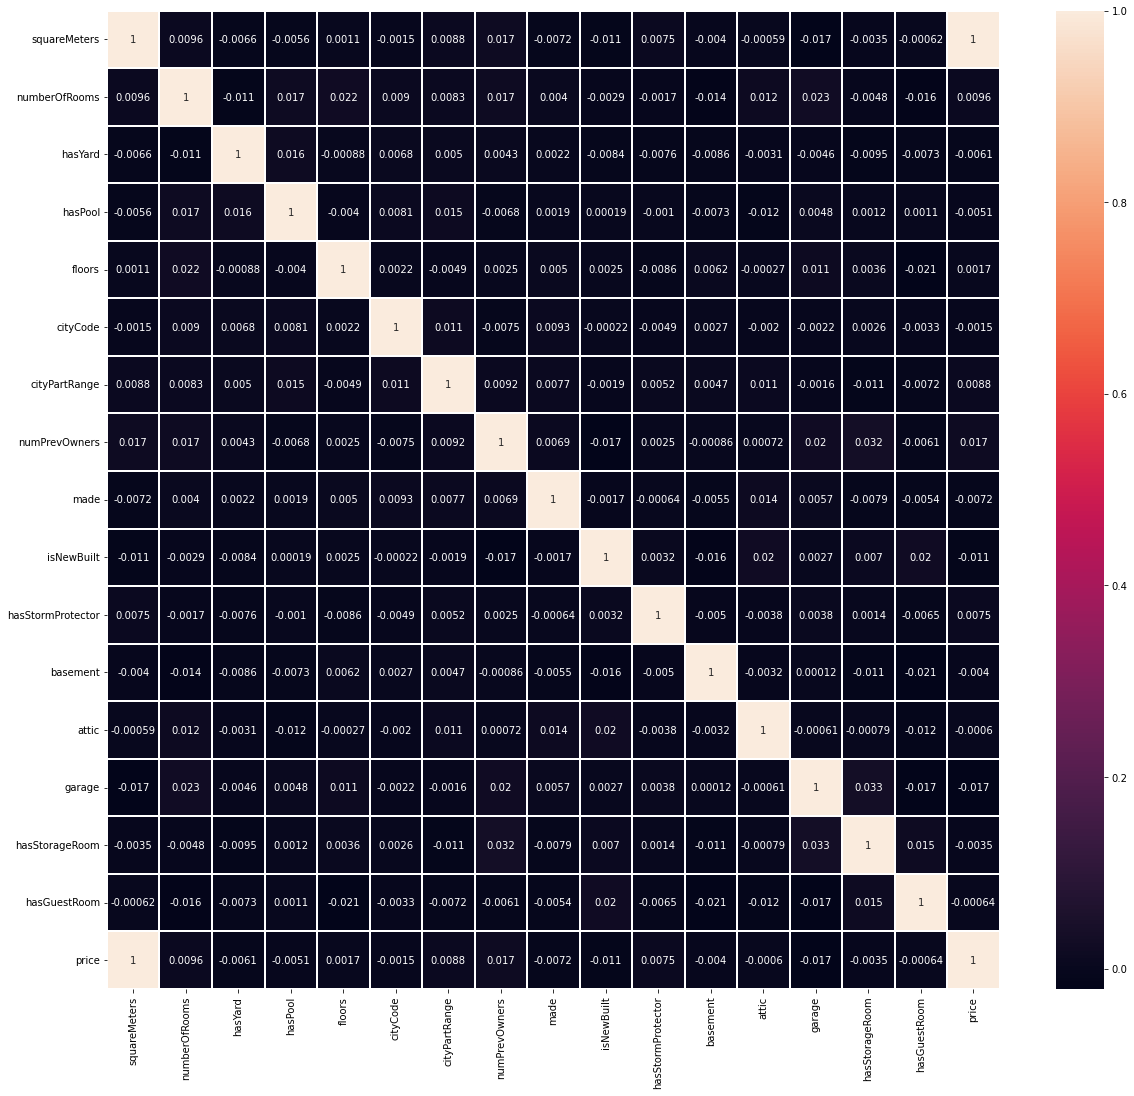

In [50]:

sns.heatmap(df.corr(),annot=True,linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,18)
plt.show()

In [51]:
print('Mean price',df.price.mean())
print('Max price',df.price.max())
print('Min price',df.price.min())

Mean price 4993447.525749963
Max price 10006771.2
Min price 10313.5


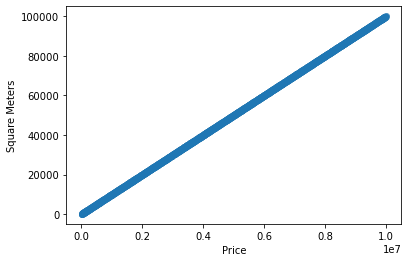

In [52]:
plt.scatter(df['price'], df['squareMeters'], alpha = 0.1)
plt.xlabel('Price')
plt.ylabel('Square Meters')
plt.show()

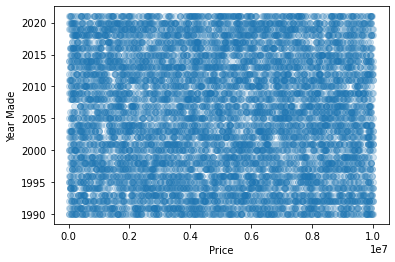

In [53]:
plt.scatter(df['price'], df['made'], alpha = 0.2)
plt.xlabel('Price')
plt.ylabel('Year Made')
plt.show()

In [54]:
X=df[['squareMeters','made']]
y=df['price']

In [55]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)

In [56]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(xtrain,ytrain)
y_lr_train_pred = lr.predict(xtrain)
y_lr_test_pred = lr.predict(xtest)

In [57]:
lr_train_mse = mean_squared_error(ytrain, y_lr_train_pred)
lr_train_r2 = r2_score(ytrain, y_lr_train_pred)

lr_test_mse = mean_squared_error(ytest, y_lr_test_pred)
lr_test_r2 = r2_score(ytest, y_lr_test_pred)

lr_result = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_result.columns = ('Method', 'Training MSE', "Training R2", 'Test MSE', 'Test R2')
lr_result

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,10663808.495036,0.999999,10575466.672915,0.999999


In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(xtrain, ytrain)

y_rf_train_pred = rf.predict(xtrain)
y_rf_test_pred = rf.predict(xtest)

rf_train_mse = mean_squared_error(ytrain, y_rf_train_pred)
rf_train_r2 = r2_score(ytrain, y_rf_train_pred)

rf_test_mse = mean_squared_error(ytest, y_rf_test_pred)
rf_test_r2 = r2_score(ytest, y_rf_test_pred)

rf_result = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_result.columns = ('Method', 'Training MSE', "Training R2", 'Test MSE', 'Test R2')
rf_result

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,488019907608.397095,0.940153,488236853104.83551,0.944257


In [68]:
df_models = pd.concat([lr_result, rf_result], axis=0).reset_index(drop=True)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,10663808.495036,0.999999,10575466.672915,0.999999
1,Random Forest,488019907608.397095,0.940153,488236853104.83551,0.944257


In [61]:
acclr = lr.score(xtrain,ytrain)
accrf = rf.score(xtrain,ytrain)
print('Linear Regression accuracy is',acclr)
print('Random Forest accuracy is',accrf)

Linear Regression accuracy is 0.9999986922679275
Random Forest accuracy is 0.9401527807343207


In [62]:
# lr.score(xtrain, ytrain)

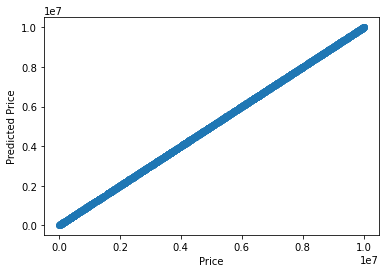

In [66]:
y_lr_train_pred = lr.predict(xtest)
plt.scatter(ytest, y_predicted)
plt.xlabel("Price")
plt.ylabel('Predicted Price')
plt.show()

In [64]:
# y_predicted

In [65]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# mae = mean_absolute_error(ytest, y_predicted)
# mse = mean_squared_error(ytest, y_predicted)
# print(f'Mean Absolute Error: {mae:.2f}')
# print(f'Mean Squared Error: {mse:.2f}')